In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load data

In [113]:
x = "S"
df = pd.read_csv("../data/mb/trainingSetDataItems_input_be.csv", ",", decimal='.')
# bring rv to the end
col = df.pop('rv')
df = df.loc[df['class'] == x]
df.insert(loc= 66 , column= 'rv', value= col)
df.fillna(0, inplace=True)
df_be = df[["kw","month_into_model_year","msrp_options","years_into_facelift","act_age_in_years","act_contract_duration_in_month", "act_mileage", "mb_resale_volume", "msrp_full", "years_into_lifecycle", "d_amg", "d_diesel", "d_suv_coupe", "d_amg_entry" ,"rv"]]

df = pd.read_csv("../data/mb/trainingSetDataItems_input_es.csv", ",", decimal='.')
# bring rv to the end
col = df.pop('rv')
df = df.loc[df['class'] == x]
df.insert(loc= 66 , column= 'rv', value= col)
df.fillna(0, inplace=True)
df_es = df[["kw","month_into_model_year","msrp_options","years_into_facelift","act_age_in_years","act_contract_duration_in_month", "act_mileage", "mb_resale_volume", "msrp_full", "years_into_lifecycle", "d_amg", "d_diesel", "d_suv_coupe", "d_amg_entry" ,"rv"]]

df = pd.read_csv("../data/mb/trainingSetDataItems_input_fr.csv", ",", decimal='.')
# bring rv to the end
col = df.pop('rv')
df = df.loc[df['class'] == x]
df.insert(loc= 66 , column= 'rv', value= col)
df.fillna(0, inplace=True)
df_fr = df[["kw","month_into_model_year","msrp_options","years_into_facelift","act_age_in_years","act_contract_duration_in_month", "act_mileage", "mb_resale_volume", "msrp_full", "years_into_lifecycle", "d_amg", "d_diesel", "d_suv_coupe", "d_amg_entry" ,"rv"]]

df = pd.read_csv("../data/mb/trainingSetDataItems_input_nl.csv", ",", decimal='.')
# bring rv to the end
col = df.pop('rv')
df = df.loc[df['class'] == x]
df.insert(loc= 66 , column= 'rv', value= col)
df.fillna(0, inplace=True)
df_nl = df[["kw","month_into_model_year","msrp_options","years_into_facelift","act_age_in_years","act_contract_duration_in_month", "act_mileage", "mb_resale_volume", "msrp_full", "years_into_lifecycle", "d_amg", "d_diesel", "d_suv_coupe", "d_amg_entry" ,"rv"]]

df = pd.read_csv("../data/mb/trainingSetDataItems_input_pt.csv", ",", decimal='.')
# bring rv to the end
col = df.pop('rv')
df.insert(loc= 66 , column= 'rv', value= col)
df.fillna(0, inplace=True)
df = df.loc[df['class'] == x]
df_pt = df[["kw","month_into_model_year","msrp_options","years_into_facelift","act_age_in_years","act_contract_duration_in_month", "act_mileage", "mb_resale_volume", "msrp_full", "years_into_lifecycle", "d_amg", "d_diesel", "d_suv_coupe", "d_amg_entry" ,"rv"]]

df = pd.read_csv("../data/mb/trainingSetDataItems_input_ca.csv", ",", decimal='.')
# bring rv to the end
col = df.pop('rv')
df.insert(loc= 66 , column= 'rv', value= col)
df.fillna(0, inplace=True)
df = df.loc[df['class'] == x]
df_ca = df[["kw","month_into_model_year","msrp_options","years_into_facelift","act_age_in_years","act_contract_duration_in_month", "act_mileage", "mb_resale_volume", "msrp_full", "years_into_lifecycle", "d_amg", "d_diesel", "d_suv_coupe", "d_amg_entry" ,"rv"]]


In [58]:
x = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_just_weights.csv", ",", decimal='.')
x = x.groupby(['class'])['mae'].mean()
x

class
A           2524.583836
AMG GT     16699.394923
B           2432.900548
C           3016.321918
CLA         3047.746301
CLS         8051.151493
E           3351.324110
G          29130.755862
GLA         3087.477123
GLB         6861.206176
GLC         4411.642603
GLE         8163.947260
GLS         9594.000143
S          12677.177887
SL         11371.001277
SLC         6924.917797
overall     3232.218630
Name: mae, dtype: float64

# Metrics

In [6]:
from get_metrics import get_transferability_metrics

sub_src_df_1 = ['df_be', 'df_es', 'df_fr', 'df_nl', 'df_ca']
sub_tar_df_2 = ['df_pt', 'df_pt', 'df_pt', 'df_pt', 'df_pt']

Values = []

for i in range (0,5):

        # get current src and tar

        df_src = getattr(modobj, sub_src_df_1[i])
        df_tar = getattr(modobj, sub_tar_df_2[i])

        save_values = get_transferability_metrics(df_src, df_tar)

        Values.append(save_values)

In [7]:
df_Values = pd.DataFrame(Values)
df_Values

,0,1,2,3,4,5,6,7
0,df_be,df_pt,4048.201589,0.059381,8597.855543,0.221407,NaN,0.046237
1,df_es,df_pt,1992.507564,0.029604,6006.919368,0.187468,NaN,0.046498
2,df_fr,df_pt,1995.125581,0.034256,6621.053485,0.305866,NaN,0.047217
3,df_nl,df_pt,--,NaN,16419.974540,0.529312,NaN,NaN
4,df_ca,df_pt,3925.549013,0.057334,6320.571473,0.198039,NaN,0.046237


# Models

## KMM

pcost       dcost       gap    pres   dres
 0: -2.0699e+14 -2.0699e+14  5e+04  5e-01  2e-16
 1: -2.0699e+14 -2.0699e+14  3e+04  3e-01  2e-16
 2: -2.0699e+14 -2.0699e+14  2e+04  2e-01  2e-16
 3: -2.0699e+14 -2.0699e+14  3e+04  2e-01  1e-16
 4: -2.0699e+14 -2.0699e+14  4e+04  2e-01  2e-16
 5: -2.0699e+14 -2.0699e+14  5e+04  2e-01  2e-16
 6: -2.0699e+14 -2.0699e+14  6e+04  2e-01  2e-16
 7: -2.0699e+14 -2.0699e+14  7e+04  2e-01  1e-16
 8: -2.0699e+14 -2.0699e+14  9e+04  2e-01  1e-16
 9: -2.0699e+14 -2.0699e+14  1e+05  2e-01  2e-16
10: -2.0699e+14 -2.0699e+14  1e+05  2e-01  2e-16
11: -2.0699e+14 -2.0699e+14  1e+05  1e-01  1e-16
12: -2.0699e+14 -2.0699e+14  2e+05  1e-01  1e-16
13: -2.0699e+14 -2.0699e+14  2e+05  1e-01  2e-16
14: -2.0699e+14 -2.0699e+14  2e+05  1e-01  1e-16
15: -2.0699e+14 -2.0699e+14  2e+05  1e-01  2e-16
16: -2.0699e+14 -2.0699e+14  3e+05  1e-01  1e-16
17: -2.0699e+14 -2.0699e+14  3e+05  1e-01  1e-16
18: -2.0699e+14 -2.0699e+14  4e+05  1e-01  1e-16
19: -2.0699e+14 -2.0699e+1

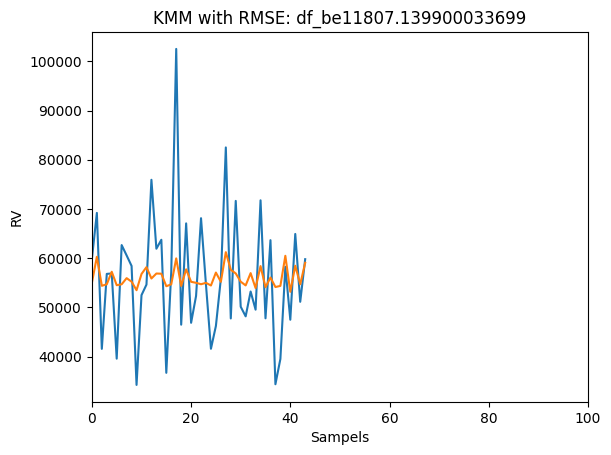

pcost       dcost       gap    pres   dres
 0: -9.9190e+14 -9.9190e+14  1e+05  3e-01  1e-16
 1: -9.9190e+14 -9.9190e+14  6e+04  1e-01  1e-16
 2: -9.9190e+14 -9.9190e+14  5e+04  8e-02  1e-16
 3: -9.9190e+14 -9.9190e+14  5e+04  7e-02  9e-17
 4: -9.9190e+14 -9.9190e+14  6e+04  7e-02  1e-16
 5: -9.9190e+14 -9.9190e+14  8e+04  6e-02  1e-16
 6: -9.9190e+14 -9.9190e+14  1e+05  6e-02  9e-17
 7: -9.9190e+14 -9.9190e+14  1e+05  6e-02  9e-17
 8: -9.9190e+14 -9.9190e+14  2e+05  6e-02  9e-17
 9: -9.9190e+14 -9.9190e+14  2e+05  6e-02  1e-16


KeyboardInterrupt: 

In [25]:
import plotly.express as px
from sklearn.decomposition import PCA
import sklearn
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from TL_Regression_Methods.KMM import KMM
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import sys
modname = globals()['__name__']
modobj  = sys.modules[modname]

sub_src_df_1 = ['df_be', 'df_es', 'df_fr', 'df_nl', 'df_ca']
sub_tar_df_2 = ['df_pt', 'df_pt', 'df_pt', 'df_pt', 'df_pt']

for i in range (0,6):

    df_src = getattr(modobj, sub_src_df_1[i])

    df_tar = getattr(modobj, sub_tar_df_2[i])

    # source split
    Xs = df_src.iloc[:,:-1]
    Ys = df_src.iloc[:,-1]

    # target split
    Xt = df_tar.iloc[:,:-1]
    Yt = df_tar.iloc[:,-1]

    # add Train Target

    X_train, X_test, y_train, y_test= train_test_split(Xt, Yt, random_state=0)

    kmm_1 = KMM()
    beta = kmm_1.fit(Xs, X_train)

    Xs = Xs.append(X_train)
    Ys = Ys.append(y_train)

    beta_append = [np.max(beta)]*len(X_train)

    beta = np.append(beta,beta_append)

    model =  DecisionTreeRegressor(max_depth=5)
    model.fit(Xs, Ys, sample_weight=beta.clip(min=0).flatten() )
    y_pre_kmm = model.predict(X_test)
    rmse_kmm = np.sqrt( mean_squared_error(y_test, y_pre_kmm) )

    print("MSE Transfer Testdata: ", rmse_kmm)

    model =  linear_model.Lasso(alpha=15)
    model.fit(Xs, Ys, sample_weight=beta.clip(min=0).flatten() )
    y_pre_kmm = model.predict(X_test)
    rmse_kmm = np.sqrt( mean_squared_error(y_test, y_pre_kmm) )

    print("MSE Transfer Testdata: ", rmse_kmm)

    regr = make_pipeline(StandardScaler(), SVR(C=200.0, epsilon=1))
    regr.fit(Xs, Ys)
    y_pre_kmm = regr.predict(X_test)
    rmse_kmm = np.sqrt( mean_squared_error(y_test, y_pre_kmm) )

    print("MSE Transfer Testdata: ", rmse_kmm)


    plt.plot(y_test.reset_index(drop=True))
    plt.plot(y_pre_kmm)
    plt.xlim(0, 100)
    plt.title('KMM with RMSE: '+ sub_src_df_1[i] + str(rmse_kmm))
    plt.xlabel('Sampels')
    plt.ylabel('RV')
    plt.show()



# Get Baselines

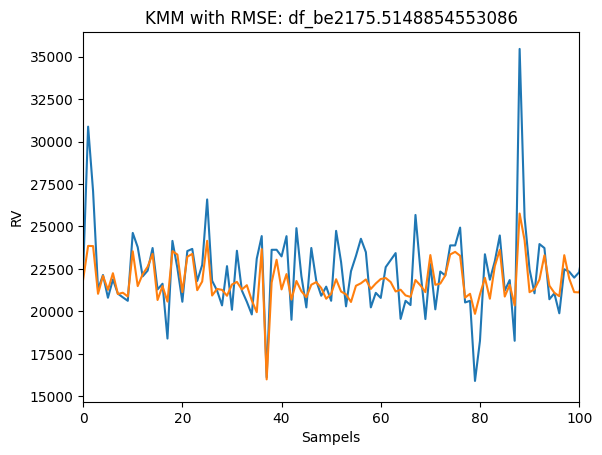

In [76]:
### Imports ###

import numpy as np
import plotly.express as px
import sklearn

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Prepare Target Data ###

df_tar = df_pt # define Target Domain
X_train, X_test, y_train, y_test= train_test_split(df_tar.iloc[:,:-1], df_tar.iloc[:,-1], random_state=0) # train Test Split

### Decision Tree Regressor Baseline ###

tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
y_pre_tree = regr.predict(X_test)
rmse_tree = np.sqrt( mean_squared_error(y_test, y_pre_tree) )

plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pre_tree)
plt.xlim(0, 100)
plt.title('DecisionTreeRegressor with RMSE: '+ sub_src_df_1[i] + str(rmse_tree))
plt.xlabel('Sampels')
plt.ylabel('RV')
plt.show()

### Lasso Regression Baseline ###

reg = Lasso(alpha=15)
reg.fit(X_train, y_train)
y_pre_reg = regr.predict(X_test)
rmse_reg = np.sqrt( mean_squared_error(y_test, y_pre_reg) )

plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pre_reg)
plt.xlim(0, 100)
plt.title('Lasso regression with RMSE: '+ sub_src_df_1[i] + str(rmse_reg))
plt.xlabel('Sampels')
plt.ylabel('RV')
plt.show()

### Support Vektor Machine Baseline ###

svm = make_pipeline(StandardScaler(), SVR(C=200.0, epsilon=1))
svm.fit(X_train, y_train)
y_pre_svm = regr.predict(X_test)
rmse_kmm = np.sqrt( mean_squared_error(y_test, y_pre_svm) )

plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pre_svm)
plt.xlim(0, 100)
plt.title('KMM with RMSE: '+ sub_src_df_1[i] + str(rmse_svm))
plt.xlabel('Sampels')
plt.ylabel('RV')
plt.show()

# Visulize KMM Results in PCA

In [593]:
    Testt_pca = Xs
    Testt_pca['beta'] = beta.flatten()
    Testt_pca['beta_T_F'] = 1
    Testt_2t_pca = Xt
    Testt_2t_pca['beta_T_F'] = 2
    Testt_2t_pca['beta'] = 2
    Testt_pca = Testt_pca.append(Testt_2t_pca)
    
    pca = PCA(n_components=3)
    components = pca.fit_transform(Testt_pca.iloc[:,:-1])

    total_var = pca.explained_variance_ratio_.sum() * 100

    fig = px.scatter_3d(
        components, x=0, y=1, z=2, color=Testt_pca['beta'], symbol=Testt_pca['beta_T_F'], color_continuous_scale= [(0, "red"), (0.7, "green"), (1, "blue")], #"Bluered_r",
        title=f'Total Explained Variance: {total_var:.2f}%',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
    )
    fig.update_traces(marker_size = 3.5)
    fig.show()

In [396]:
    sub_src_df_1 = ['df_es', 'df_fr', 'df_nl', 'df_pt', 'df_ca']
    
    Test_1 = df_es
    Test_2 = df_be
    Test_3 = df_fr
    Test_4 = df_nl
    Test_5 = df_ca
    Test_6 = df_pt

    Test_1['land'] = "df_es"
    Test_2['land'] = "df_be"
    Test_3['land'] = "df_fr"
    Test_4['land'] = "df_nl"
    Test_5['land'] = "df_ca"
    Test_6['land'] = "df_pt"

    Test = Test_1.append(Test_2).append(Test_3).append(Test_4).append(Test_5).append(Test_6)
    
    pca = PCA(n_components=3)
    components = pca.fit_transform(Test.iloc[:,:-1])

    total_var = pca.explained_variance_ratio_.sum() * 100

    fig = px.scatter_3d(
        components, x=0, y=1, z=2, color=Test['land'],
        title=f'Total Explained Variance: {total_var:.2f}%',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
    )
    fig.update_traces(marker_size = 3.5)
    fig.show()

In [376]:
    Test = Xs
    Test_2 = Xt
    Test['beta'] = beta.flatten()
    Test['beta_T_F'] = 1
    Test_2['beta_T_F'] = 2
    Test_2['beta'] = 5
    Test = Test.append(Xt)
    
    pca = PCA(n_components=2)
    components = pca.fit_transform(Test.iloc[:,:-1])

    total_var = pca.explained_variance_ratio_.sum() * 100

    fig = px.scatter(
        components, color=Test['beta'], symbol=Test['beta_T_F'], color_continuous_scale= [(0, "red"), (0.7, "green"), (1, "blue")], #"Bluered_r",
        title=f'Total Explained Variance: {total_var:.2f}%'
    )
    fig.update_traces(marker_size = 3.5)
    fig.show()

# AdaBoost

3.52408165e-04 4.48610127e-10 1.34438271e-03
 1.91113044e-08 3.45492872e-06 7.94967561e-07 9.53039393e-04
 2.90659712e-05 4.12604955e-04 2.75637972e-03 2.88956553e-03
 1.86513974e-03 1.12125575e-03 1.60497380e-05 1.16277903e-03
 1.28282399e-07 2.58654489e-03 1.50941351e-05 7.80433267e-06
 3.69323578e-05 3.98256154e-06 1.10625850e-04 1.55630380e-03
 3.04604862e-03 5.05761820e-03 3.77517567e-04 5.83332913e-04
 4.75157399e-06 1.43486957e-05 1.52555413e-03 3.23402196e-05
 1.10982923e-03 9.01550656e-04 3.18918248e-05 7.37893948e-05
 3.78736535e-04 5.13001841e-04 1.51133046e-06 2.38581598e-03
 7.38465428e-07 2.38088440e-03 5.90086764e-03 2.27827056e-06
 3.44000083e-05 2.99186108e-04 7.78446224e-06 3.17228727e-04
 5.75910651e-03 4.08364562e-13 4.60426892e-04 9.25159647e-04
 1.29788602e-03 8.60857726e-04 1.38614842e-06 3.64630101e-21
 3.06429595e-13 2.79369288e-05 1.44158476e-08 3.13543892e-07
 3.37431443e-08] 201
[3.75507900e-06 1.12327502e-07 8.48099258e-09 6.69719844e-14
 8.29030926e-12 1.3

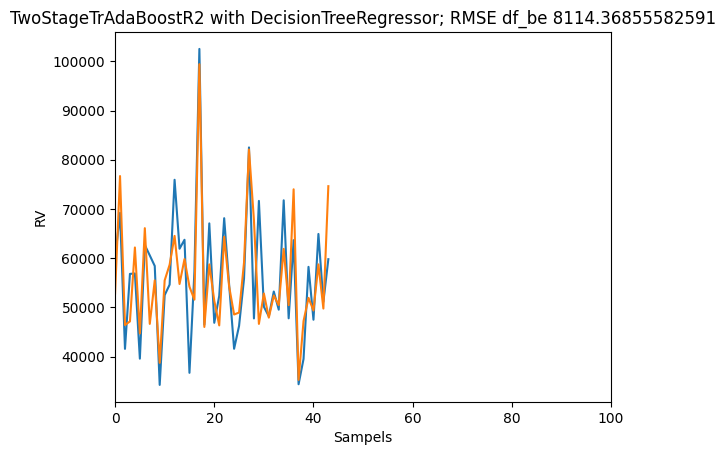

In [16]:
from TL_Regression_Methods.TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.decomposition import PCA
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from TL_Regression_Methods.KMM import KMM
from sklearn.linear_model import Ridge

import sys
modname = globals()['__name__']
modobj  = sys.modules[modname]

sub_src_df_1 = ['df_be', 'df_es', 'df_fr', 'df_nl', 'df_ca']
sub_tar_df_2 = ['df_pt', 'df_pt', 'df_pt', 'df_pt', 'df_pt']

results = []

for i in range (0,1):

    df_src = getattr(modobj, sub_src_df_1[i])

    df_tar = getattr(modobj, sub_tar_df_2[i])

    x_target_train, x_target_test, y_target_train, y_target_test= train_test_split(df_tar.iloc[:,:-1], df_tar.iloc[:,-1], random_state=0)

    # source
    n_source1 = len(df_src)
    x_source1 = df_src.iloc[:,:-1]
    y_source1 = df_src.iloc[:,-1]

    # target_train
    n_target_train = len(x_target_train)

    # target_test
    n_target_test = len(x_target_test)

    print(n_source1,n_target_train,n_target_test)

    # 4. transfer learning regressiong for the target_train data
    # 4.1 data combination and initial setting specification
    X = np.concatenate((x_source1, x_target_train))
    y = np.concatenate((y_source1, y_target_train))
    sample_size = [n_source1, n_target_train]

    n_estimators = 80
    steps = 10
    fold = 5
    random_state = np.random.RandomState(1)

    regr_1 = XXTwoStageTrAdaBoostR2( KNeighborsRegressor(n_neighbors=3), #DecisionTreeRegressor(max_depth=8), # linear_model.Lasso(alpha=15), #KNeighborsRegressor(n_neighbors=3), #
                        n_estimators = n_estimators, sample_size = sample_size, 
                        steps = steps, fold = fold, 
                        random_state = random_state)
    regr_1.fit(X, y)
    y_pre_twostageboost = regr_1.predict(x_target_test)
    rmse_twostageboost = np.sqrt( mean_squared_error(y_target_test, y_pre_twostageboost) )

    results.append(sub_src_df_1[i])
    results.append(rmse_twostageboost)

    plt.plot(y_target_test.reset_index(drop=True))
    plt.plot(y_pre_twostageboost)
    plt.xlim(0, 100)
    plt.title('TwoStageTrAdaBoostR2 with DecisionTreeRegressor; RMSE '+ sub_src_df_1[i] +" "+str(rmse_twostageboost))
    plt.xlabel('Sampels')
    plt.ylabel('RV')
    plt.show()

# Visulize TrAdaBoost Results in PCA

In [32]:
    Testt_pca = x_source1
    Testt_pca['beta'] = sample_weight[3].flatten()
    Testt_pca['beta_T_F'] = 1
    Testt_2t_pca = x_target_train
    Testt_2t_pca['beta_T_F'] = 2
    Testt_2t_pca['beta'] = sample_weight[2].flatten()
    Testt_pca = Testt_pca.append(Testt_2t_pca)
    
    pca = PCA(n_components=3)
    components = pca.fit_transform(Testt_pca.iloc[:,:-1])

    total_var = pca.explained_variance_ratio_.sum() * 100

    fig = px.scatter_3d(
        components, x=0, y=1, z=2, color=Testt_pca['beta'], symbol=Testt_pca['beta_T_F'], color_continuous_scale= [(0, "red"), (0.7, "green"), (1, "blue")], #"Bluered_r",
        title=f'Total Explained Variance: {total_var:.2f}%',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
    )
    fig.update_traces(marker_size = 3.5)
    fig.show()